# Dataset-1 (E - Car Data )

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [3]:
df1=pd.read_csv('C:/Users/admin/Downloads/ElectricCarData.csv')

In [4]:
df1.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    object 
 7   RapidCharge      103 non-null    object 
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 11.4+ KB


In [6]:
df1.describe()

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,Seats,PriceEuro
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,7.396117,179.194175,338.786408,189.165049,4.883495,55811.563107
std,3.017430,43.573030,126.014444,29.566839,0.795834,34134.665280
min,2.100000,123.000000,95.000000,104.000000,2.000000,20129.000000
25%,5.100000,150.000000,250.000000,168.000000,5.000000,34429.500000
50%,7.300000,160.000000,340.000000,180.000000,5.000000,45000.000000
75%,9.000000,200.000000,400.000000,203.000000,5.000000,65000.000000
max,22.400000,410.000000,970.000000,273.000000,7.000000,215000.000000


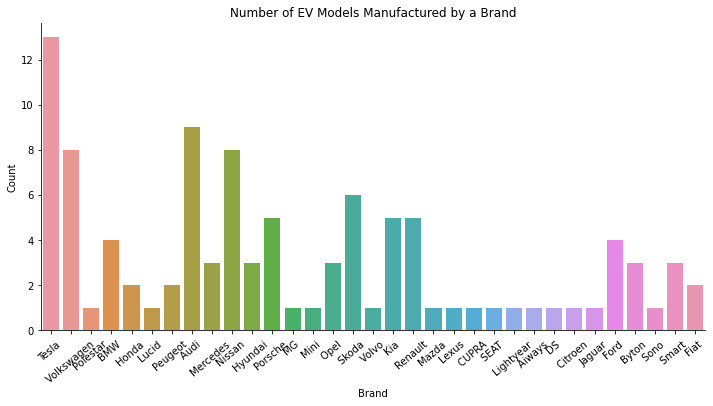

In [7]:
# brand-wise count of EV models
sns.catplot(data=df1, x='Brand', kind='count', aspect=2)
plt.tick_params(axis='x', rotation=40)
plt.xlabel('Brand')
plt.ylabel('Count')
plt.title('Number of EV Models Manufactured by a Brand')
plt.show()

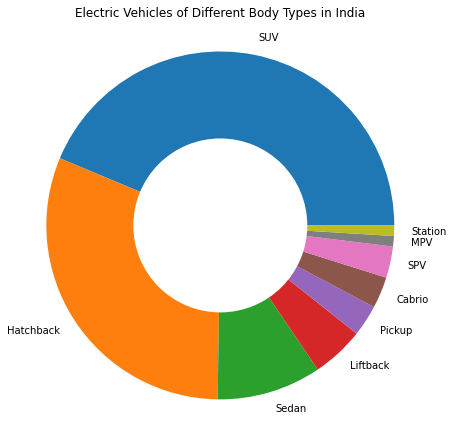

In [8]:
# different body types EVs visualization from dataset 1
x = df1['BodyStyle'].value_counts().plot.pie(radius=2)
plt.pie(x=[1], colors='white')
plt.title(label='Electric Vehicles of Different Body Types in India', pad=100)
plt.ylabel('')
plt.show()

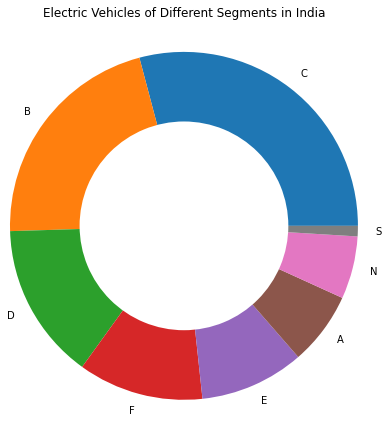

In [9]:
# analysis of different segments of EVs from dataset 1
x = df1['Segment'].value_counts().plot.pie(radius=2)
plt.pie(x=[1], radius=1.2, colors='white')
plt.title(label='Electric Vehicles of Different Segments in India', pad=100)
plt.ylabel('')
plt.show()

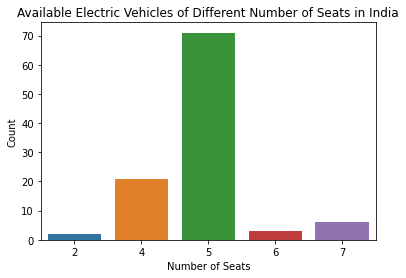

In [10]:
# EVs of different number of seats from dataset 1
sns.countplot(data=df1, x='Seats')
plt.xlabel('Number of Seats')
plt.ylabel('Count')
plt.title(label='Available Electric Vehicles of Different Number of Seats in India')
plt.show()

Text(0.5, 1.0, 'Brand-wise Analysis of the Number of Seats')

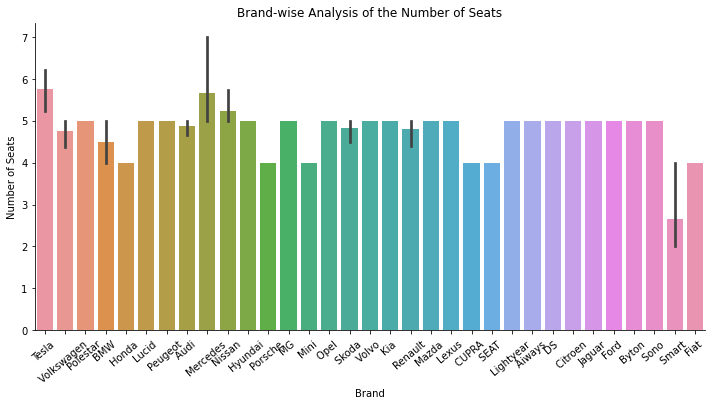

In [11]:
# brand-wise analysis of the number of seats
sns.catplot(kind='bar', data=df1, x='Brand', y='Seats',aspect=2)
plt.tick_params(axis='x', rotation=40)
plt.xlabel('Brand')
plt.ylabel('Number of Seats')
plt.title('Brand-wise Analysis of the Number of Seats')

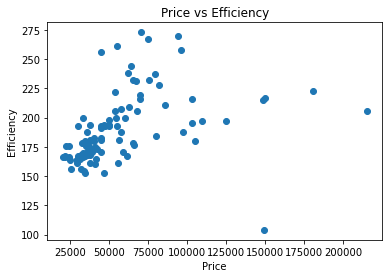

In [12]:
#scatter plot for knowing the relation between price and efficiency
plt.scatter(df1['PriceEuro'], df1['Efficiency_WhKm'])
plt.xlabel('Price')
plt.ylabel('Efficiency')
plt.title('Price vs Efficiency')
plt.show()

Text(0.5, 1.0, 'Price Comparison')

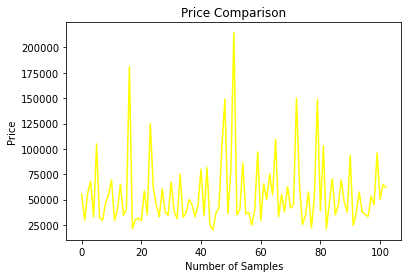

In [13]:
# plotting the price from dataset 1
plt.plot(df1['PriceEuro'], color='Yellow')
plt.xlabel('Number of Samples')
plt.ylabel('Price')
plt.title('Price Comparison')

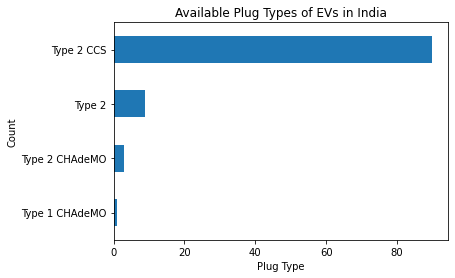

In [14]:
# plug types visualization from dataset 1
df1['PlugType'].value_counts().sort_values(ascending=True).plot.barh()
plt.xlabel('Plug Type')
plt.ylabel('Count')
plt.title('Available Plug Types of EVs in India')
plt.show()

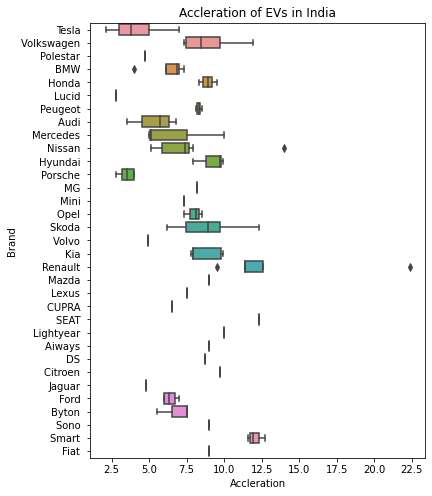

In [15]:
# accleration visualization from dataset 1
plt.figure(figsize=(6, 8))
sns.boxplot(data=df1, x='AccelSec', y='Brand')
plt.xlabel('Accleration')
plt.ylabel('Brand')
plt.title(label='Accleration of EVs in India')
plt.show()

Text(0.5, 1.0, 'Brand-wise Analysis of the Range Parameter')

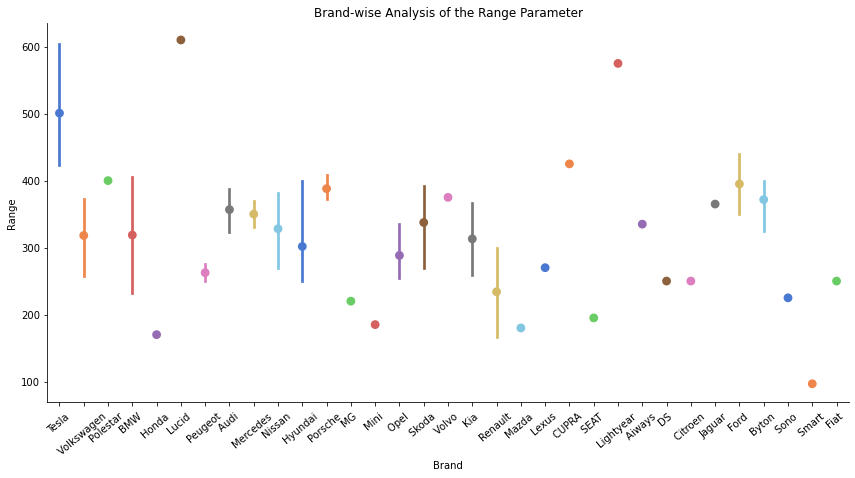

In [16]:
# brand-wise analysis of the range parameter
sns.catplot(kind='point', data=df1, x='Brand', y='Range_Km', palette='muted', height=6, aspect=2)
plt.tick_params(axis='x', rotation=40)
plt.xlabel('Brand')
plt.ylabel('Range')
plt.title('Brand-wise Analysis of the Range Parameter')

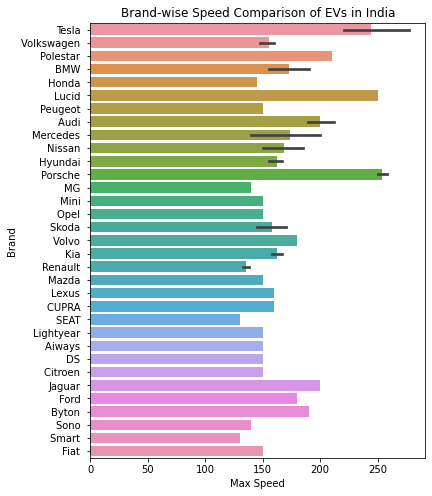

In [17]:
# speed visualization from dataset 1
plt.figure(figsize=(6, 8))
sns.barplot(data=df1, x='TopSpeed_KmH', y='Brand')
plt.xlabel('Max Speed')
plt.ylabel('Brand')
plt.title(label='Brand-wise Speed Comparison of EVs in India')
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

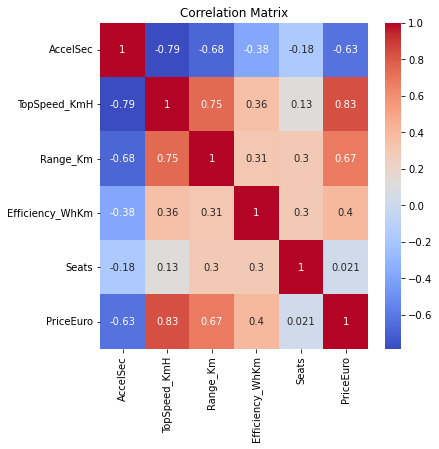

In [18]:
# plotting the correlation matrix from dataset 1
plt.figure(figsize=(6,6))
sns.heatmap(data=df1.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')

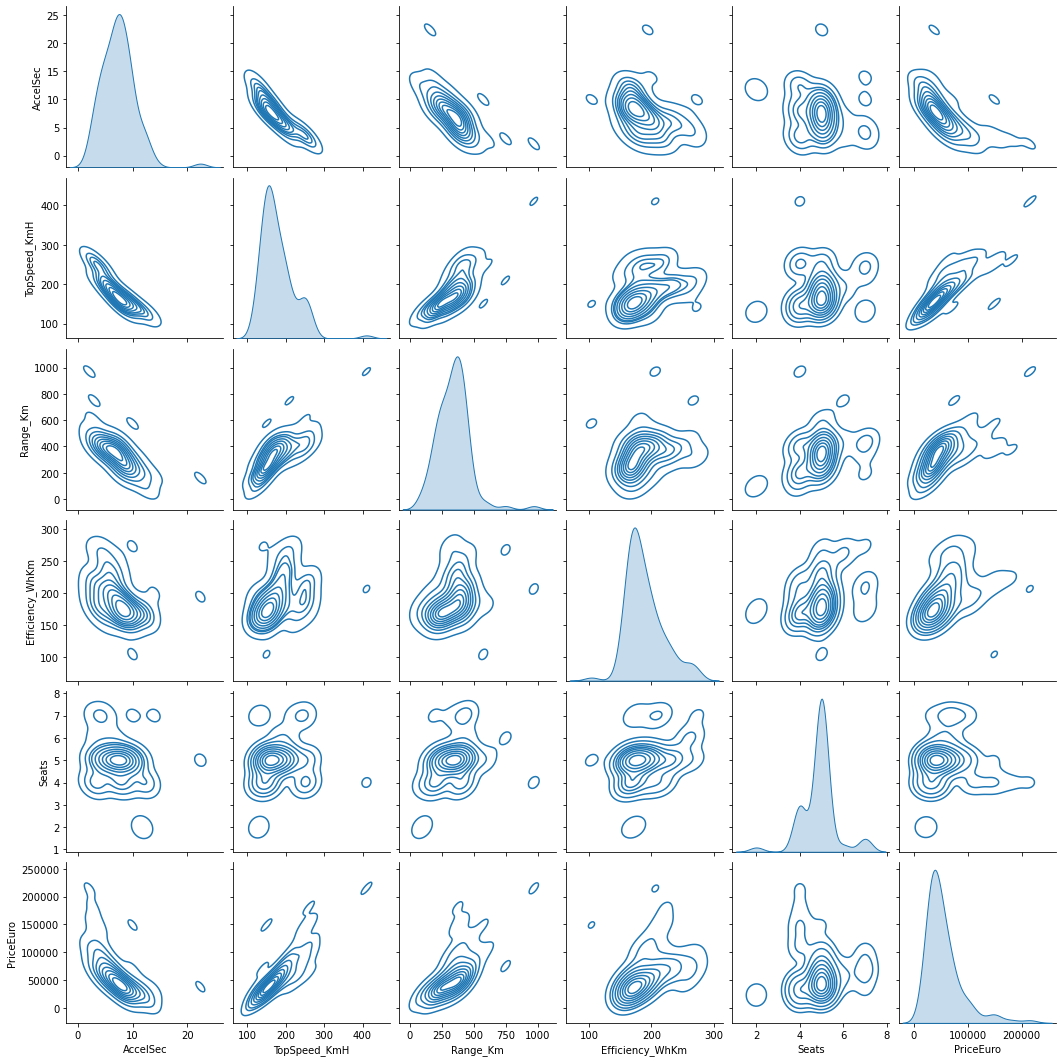

In [19]:
sns.pairplot(df1, kind='kde')

In [20]:
# encoding the categorical features
import numpy as np
# PowerTrain feature
df1['PowerTrain'] = df1['PowerTrain'].replace('RWD', 0)
df1['PowerTrain'] = df1['PowerTrain'].replace('FWD', 1)
df1['PowerTrain'] = df1['PowerTrain'].replace('AWD', 2)


# RapidCharge feature
df1['RapidCharge'] = np.where(df1['RapidCharge'] == 'N0', 0, 1)

#plug type feature
df1['PlugType'] = df1['PlugType'].replace('Type 2 CCS', 0)
df1['PlugType'] = df1['PlugType'].replace('Type 2', 1)
df1['PlugType'] = df1['PlugType'].replace('Type 1 CHAdeMO', 2)
df1['PlugType'] = df1['PlugType'].replace('Type 2 CHAdeMO', 3)

#Body Style Features
df1['BodyStyle'] = df1['BodyStyle'].replace('SUV', 0)
df1['BodyStyle'] = df1['BodyStyle'].replace('Sedan', 1)
df1['BodyStyle'] = df1['BodyStyle'].replace('Hatchback', 2)
df1['BodyStyle'] = df1['BodyStyle'].replace('Liftback', 3)
df1['BodyStyle'] = df1['BodyStyle'].replace('Pickup', 4)
df1['BodyStyle'] = df1['BodyStyle'].replace('MPV', 5)
df1['BodyStyle'] = df1['BodyStyle'].replace('Cabrio', 6)
df1['BodyStyle'] = df1['BodyStyle'].replace('SPV', 7)
df1['BodyStyle'] = df1['BodyStyle'].replace('Station', 8)

#Segment Features
df1['Segment'] = df1['Segment'].replace('A', 0)
df1['Segment'] = df1['Segment'].replace('B', 1)
df1['Segment'] = df1['Segment'].replace('C', 2)
df1['Segment'] = df1['Segment'].replace('D', 3)
df1['Segment'] = df1['Segment'].replace('E', 4)
df1['Segment'] = df1['Segment'].replace('F', 5)
df1['Segment'] = df1['Segment'].replace('N', 6)
df1['Segment'] = df1['Segment'].replace('S', 7)

In [22]:
# selecting features for building a model
df1 = df1.replace('-', 0) #Inorder to convert string to float
df1 = df1.dropna()
DF_x=df1.iloc[:, 2:14]
X = df1[['AccelSec','TopSpeed_KmH','Efficiency_WhKm','FastCharge_KmH', 'Range_Km', 'RapidCharge', 'Seats', 'PriceEuro','PowerTrain']]

In [23]:
# feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [24]:
# applying Principle Component Analysis (PCA)
pca = PCA(n_components=9)
X_pca = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9'])
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,2.320731,-0.699856,-1.467814,-0.762418,-0.852829,0.107768,0.963562,-0.596837,-3.121998e-18
1,-2.032823,-0.011173,-0.683687,0.544826,0.378508,-0.352072,-0.285682,-0.217434,-1.636309e-18
2,1.508148,-0.153956,-0.427332,-0.712491,-0.665404,0.190228,0.052361,-0.233873,-2.595348e-18
3,0.210891,-0.062747,-0.275736,1.607412,0.183760,-0.410909,0.233644,0.274760,4.509842e-18
4,-2.676873,-0.918330,0.242944,0.490193,-0.147755,-0.416208,-0.216688,0.059650,6.278796e-18


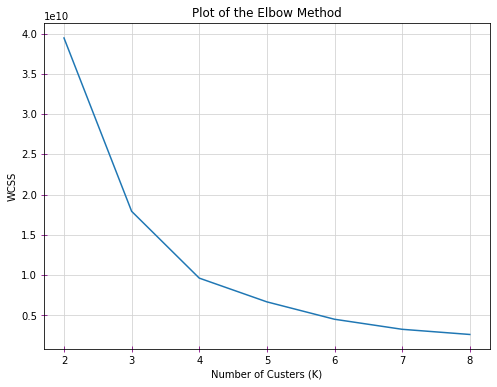

In [25]:
# plotting the results of Elbow

wcss = []

for i in range(2, 9):
    kmean = KMeans(n_clusters=i, init='k-means++', random_state=1234)
    kmean.fit(DF_x)
    wcss.append(kmean.inertia_)

plt.figure(figsize=(8,6))
plt.title('Plot of the Elbow Method')
plt.plot(range(2, 9), wcss)
plt.xticks(range(2, 9))
plt.xlabel('Number of Custers (K)')
plt.ylabel('WCSS')
plt.grid()
plt.tick_params(axis='both', direction='inout', length=6, color='purple', grid_color='lightgray', grid_linestyle='-')
plt.show()

In [26]:
# training the model using k=4 as rendered by the above plot
kmean = KMeans(n_clusters=4, init='k-means++', random_state=1234)
kmean.fit(DF_x)

KMeans(n_clusters=4, random_state=1234)

In [27]:
# check the labels assigned to each data point
print(kmean.labels_)

[3 0 3 3 0 1 0 0 0 3 3 0 0 3 0 0 2 0 0 0 0 3 0 1 3 0 0 3 0 0 3 0 0 3 0 0 3
 0 0 0 3 0 1 0 0 0 0 1 2 0 3 2 0 0 1 0 0 0 0 1 0 3 3 3 3 1 0 3 0 3 0 0 2 3
 0 0 3 0 3 2 0 1 0 0 3 0 0 3 0 0 1 0 0 3 0 0 0 3 0 1 3 3 3]


In [28]:
# check the size of clusters
pd.Series(kmean.labels_).value_counts()

0    58
3    30
1    10
2     5
dtype: int64

In [29]:
# adding a new feature of cluster labels to the dataset 1
df1['clusters'] = kmean.labels_

In [30]:
df_pca=df_pca[:99]

In [31]:
# visualizing clusters
sns.scatterplot(data=df_pca, x='PC1', y='PC9', s=70, hue=kmean.labels_, palette='viridis', zorder=2, alpha=.9)
plt.scatter(x=kmean.cluster_centers_[:, 0], y=kmean.cluster_centers_[:, 1], marker="*", c="r", s=80, label="centroids")
plt.xlabel('PC1')
plt.ylabel('PC9')
plt.grid()
plt.tick_params(grid_color='lightgray', grid_linestyle='-', zorder=1)
plt.legend(title='Labels', fancybox=True, shadow=True)
plt.title('K-Means Clustering Results', family='serif', size=15)
plt.show()

ValueError: Length of ndarray vectors must match length of `data` when both are used, but `data` has length 99 and the vector passed to `hue` has length 103.

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [33]:
# Feature selection for performance data
X_performance = df1[['Range_Km', 'AccelSec', 'TopSpeed_KmH', 'FastCharge_KmH']]
y_performance = df1['Efficiency_WhKm']

# Split the performance data into training and testing sets
X_performance_train, X_performance_test, y_performance_train, y_performance_test = train_test_split(X_performance, y_performance, test_size=0.2, random_state=42)


In [34]:
# Train a Linear Regression model on performance data
linear_model_perf = LinearRegression()
linear_model_perf.fit(X_performance_train, y_performance_train)

LinearRegression()

In [35]:
# Model evaluation for performance data - Linear Regression
y_performance_pred_linear = linear_model_perf.predict(X_performance_test)
performance_mse_linear = mean_squared_error(y_performance_test, y_performance_pred_linear)
print('Performance Linear Regression Model Mean Squared Error:', performance_mse_linear)


Performance Linear Regression Model Mean Squared Error: 1154.143861306424


In [36]:
# Train a Decision Tree Regressor on performance data
decision_tree_model_perf = DecisionTreeRegressor(random_state=42)
decision_tree_model_perf.fit(X_performance_train, y_performance_train)

DecisionTreeRegressor(random_state=42)

In [37]:
# Model evaluation for performance data - Decision Tree
y_performance_pred_dt = decision_tree_model_perf.predict(X_performance_test)
performance_mse_dt = mean_squared_error(y_performance_test, y_performance_pred_dt)
print('Performance Decision Tree Model Mean Squared Error:', performance_mse_dt)

Performance Decision Tree Model Mean Squared Error: 979.952380952381


In [38]:
# Train a Random Forest Regressor on performance data
random_forest_model_perf = RandomForestRegressor(random_state=42)
random_forest_model_perf.fit(X_performance_train, y_performance_train)

RandomForestRegressor(random_state=42)

In [39]:
# Model evaluation for performance data - Random Forest
y_performance_pred_rf = random_forest_model_perf.predict(X_performance_test)
performance_mse_rf = mean_squared_error(y_performance_test, y_performance_pred_rf)
print('Performance Random Forest Model Mean Squared Error:', performance_mse_rf)

Performance Random Forest Model Mean Squared Error: 1061.9197523809526


In [40]:
from sklearn.naive_bayes import GaussianNB  
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn import metrics

In [41]:
knn = KNeighborsClassifier()
rfc = RandomForestClassifier()
svc = SVC()
dt_clf=DecisionTreeClassifier()
nb_clf=GaussianNB()

  
# making predictions on the training set
for clf in (rfc, knn, svc,dt_clf,nb_clf):
    clf.fit(X_performance_train, y_performance_train)
    y_pred = clf.predict(X_performance_train)
    print("Accuracy score of ", clf.__class__.__name__, "=",100*metrics.accuracy_score(y_performance_train, y_pred))

Accuracy score of  RandomForestClassifier = 100.0
Accuracy score of  KNeighborsClassifier = 40.243902439024396
Accuracy score of  SVC = 17.073170731707318
Accuracy score of  DecisionTreeClassifier = 100.0
Accuracy score of  GaussianNB = 63.41463414634146


In [42]:
for clf in (rfc, knn, svc,dt_clf,nb_clf):
    clf.fit(X_performance_train, y_performance_train)
    y_pred = clf.predict(X_performance_test)
    print("Accuracy score of ",
          clf.__class__.__name__,"=", 100*metrics.accuracy_score(y_performance_test, y_pred))
    print(confusion_matrix(y_performance_test, y_pred))
    print(classification_report(y_performance_test, y_pred))

Accuracy score of  RandomForestClassifier = 14.285714285714285
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

         160       0.00      0.00      0.00         1
         161       0.00      0.00      0.00         1
         164       0.00      0.00      0.00         0
         166       0.00      0.00      0.00         1
         168       1.00      1.00      1.00         2
         171       0.00      0.00      0.00         0
         173       0.00      0.00      0.00         1
         175       0.33      1.00      0.50         1
         178       0.00      0.00      0.00         0
         180       0.00      0.00      0.00         0
         183       0.00      0.00      0.00         0
         184       0.00      0.00      0.00         1
         188       0.00      0.00      0.00         1
         191       0.00      0.00      0.00         0
      

C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_cla

              precision    recall  f1-score   support

         156       0.00      0.00      0.00         0
         160       0.00      0.00      0.00         1
         161       0.00      0.00      0.00         1
         166       0.00      0.00      0.00         1
         167       0.00      0.00      0.00         0
         168       1.00      1.00      1.00         2
         171       0.00      0.00      0.00         0
         173       0.00      0.00      0.00         1
         175       0.33      1.00      0.50         1
         178       0.00      0.00      0.00         0
         180       0.00      0.00      0.00         0
         181       0.00      0.00      0.00         0
         183       0.00      0.00      0.00         0
         184       0.00      0.00      0.00         1
         188       0.00      0.00      0.00         1
         193       0.00      0.00      0.00         1
         194       0.00      0.00      0.00         1
         195       0.00    

C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_cla